<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [8]:
# Answer:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


In [14]:
movies.shape

(979, 6)

#### Check the data type of each column.

In [11]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [13]:
# Answer:
movies["duration"].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [19]:
# Answer:
movies.sort_values("duration").head()

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."


In [20]:
movies.sort_values("duration").tail()

,star_rating,title,content_rating,genre,duration,actors_list
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

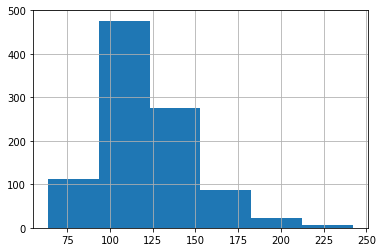

In [25]:
# Answer:
movies.duration.hist(bins=6);

#### Use a box plot to display that same data.

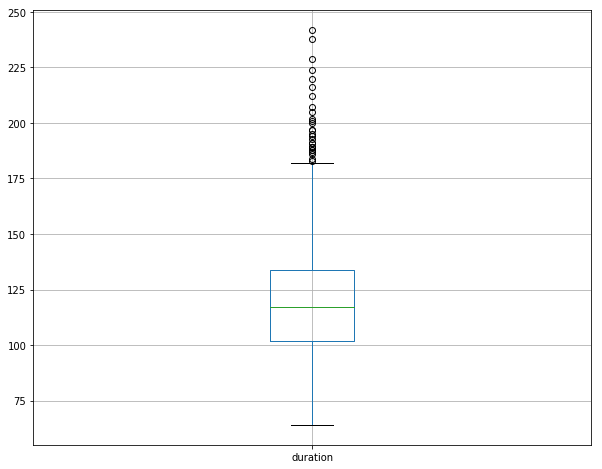

In [37]:
# Answer:
movies.boxplot(column="duration", figsize=(10,8));

## Intermediate level

#### Count how many movies have each of the content ratings.

In [39]:
# Answer:
movies["content_rating"].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

AttributeError: Unknown property x_label

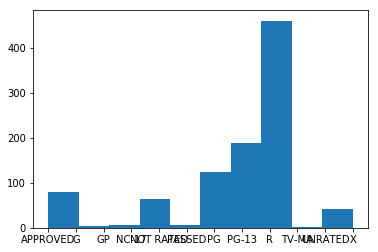

In [47]:
# Answer:
movies["content_rating"].hist(x_label="Rating");

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [54]:
# Answer:
movies.loc[movies.content_rating == "NOT RATED", "content_rating"] = "UNRATED"
movies.loc[movies.content_rating == "APPROVED", "content_rating"] = "UNRATED"
movies.loc[movies.content_rating == "PASSED", "content_rating"] = "UNRATED"
movies.loc[movies.content_rating == "GP", "content_rating"] = "UNRATED"
movies["content_rating"].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [59]:
# Answer:
movies.loc[movies.content_rating == "X", "content_rating"] = "NC-17"
movies.loc[movies.content_rating == "TV-MA", "content_rating"] = "NC-17"
movies["content_rating"].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [60]:
# Answer:
movies.content_rating.isnull().sum()

3

In [88]:
movies[movies.content_rating.isnull()].head()

,star_rating,title,content_rating,genre,duration,actors_list


#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [78]:
# Answer:
movies.loc[movies.title=="Butch Cassidy and the Sundance Kid", "content_rating"] = "PG"
movies.loc[movies.title=="Where Eagles Dare", "content_rating"] = "PG-13"
movies.loc[movies.title=="True Grit", "content_rating"] = "R"
movies[movies.content_rating.isnull()].head()

,star_rating,title,content_rating,genre,duration,actors_list


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [82]:
# Answer:
long = movies.loc[movies.duration > 120]
long["star_rating"].mean()
short = movies.loc[movies.duration < 120]
short["star_rating"].mean()

7.953669724770622

#### Use a visualization to detect whether there is a relationship between duration and star rating.

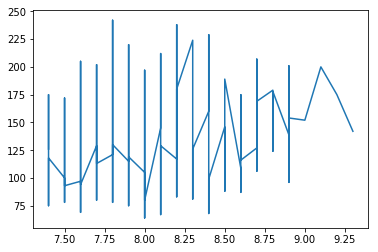

In [104]:
# Answer:
plt.plot(movies['star_rating'], movies['duration']);

#### Calculate the average duration for each genre.

In [ ]:
# Answer:
movies.loc

## Advanced level

#### Visualize the relationship between content rating and duration.

In [ ]:
# Answer:

#### Determine the top rated movie (by star rating) for each genre.

In [ ]:
# Answer:

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [ ]:
# Answer:

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [ ]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!